# Chapter 5: Support Vector Machines
Exercises here basically implement various forms of SVM. We'll create a separable dataset using the iris dataset and reduce down to just `versicolor` and `virginica`.

In [61]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [62]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2

In [63]:
df_iris = sns.load_dataset('iris')
df_iris.species.unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [64]:
def map_values(row, values_dict):
    return values_dict[row]

species = {'setosa': 0, 'versicolor': 1, 'virginica': 2}
df_iris['species_val'] = df_iris['species'].apply(map_values, args=(species,))
df_vv = df_iris[df_iris.species_val > 0]

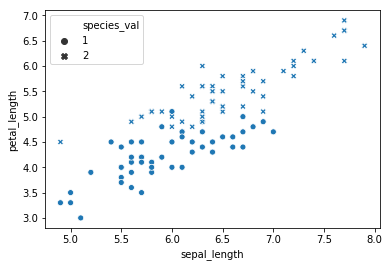

In [65]:
sns.scatterplot(df_vv.sepal_length, df_vv.petal_length, style=df_vv.species_val)

## Linear SVM

In [66]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

In [67]:
X = df_vv[['sepal_length', 'petal_length']].values
y = (df_vv['species_val'] == 2).astype(np.float64)

In [68]:
svm_clf = Pipeline([
    ("scaler", StandardScaler()),
    ("linear_svc", LinearSVC(C=1, loss="hinge"))
])
svm_clf.fit(X, y)

Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('linear_svc', LinearSVC(C=1, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
     penalty='l2', random_state=None, tol=0.0001, verbose=0))])

In [55]:
from sklearn.model_selection import cross_val_score

In [57]:
scores = cross_val_score(svm_clf, X, y, cv=5)

In [60]:
scores

array([0.9 , 1.  , 0.85, 0.9 , 0.95])

In [72]:
??np.linspace

Signature: np.linspace(start, stop, num=50, endpoint=True, retstep=False, dtype=None)
Source:   
def linspace(start, stop, num=50, endpoint=True, retstep=False, dtype=None):
    """
    Return evenly spaced numbers over a specified interval.

    Returns `num` evenly spaced samples, calculated over the
    interval [`start`, `stop`].

    The endpoint of the interval can optionally be excluded.

    Parameters
    ----------
    start : scalar
        The starting value of the sequence.
    stop : scalar
        The end value of the sequence, unless `endpoint` is set to False.
        In that case, the sequence consists of all but the last of ``num + 1``
        evenly spaced samples, so that `stop` is excluded.  Note that the step
        size changes when `endpoint` is False.
    num : int, optional
        Number of samples to generate. Default is 50. Must be non-negative.
    endpoint : bool, optional
        If True, `stop` is the last sample. Otherwise, it is not included.
      